In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%maplotlib inline

UsageError: Line magic function `%maplotlib` not found.


In [4]:
win=pd.read_csv(r"C:\Users\Menaka\Desktop\wine.csv")

In [6]:
win.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [9]:
win.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

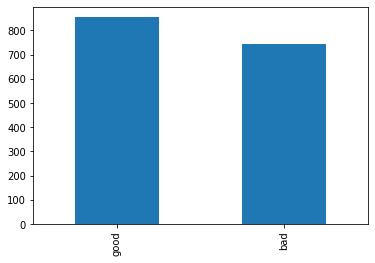

In [11]:
win['quality'].value_counts().plot.bar()

In [13]:
x=win.drop('quality',axis=1).values

In [19]:
y=win["quality"].values


In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [26]:
#x_train,x_test

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

def trainknn(x_train,y_train,k):
    classifier=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    classifier.fit(x_train,y_train)
    return classifier
    
    

In [69]:
def predictClassifier(x_test,classifier):
    y_pred = classifier.predict(x_test)
    return y_pred

In [70]:
from sklearn.metrics import accuracy_score
def calculateAccuracy(y_pred,y_test):
      accuracy = accuracy_score(y_pred,y_test)
      return accuracy

In [72]:
kvalues = [x for x in range(1,52,2)]
print(kvalues)
accuracylist = []
for k in tqdm(kvalues):
    knnClassifier = trainknn(x_train,y_train,k)
    y_pred = predictClassifier(x_test,knnClassifier)
    acc = calculateAccuracy(y_pred,y_test)
    accuracylist.append(acc)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]


100%|██████████████████████████████████████████| 26/26 [00:04<00:00,  5.44it/s]


Text(0, 0.5, 'Accuarcy')

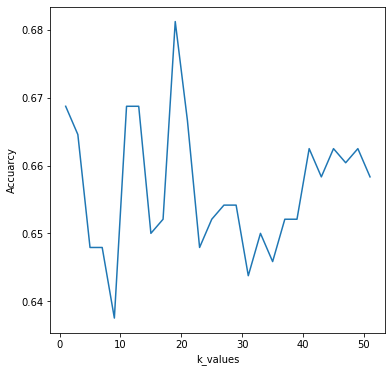

In [83]:
fig=plt.figure(figsize=(6,6))
ax=plt.subplot()
plt.plot(kvalues,accuracylist)
ax.set_xlabel('k_values')
ax.set_ylabel('Accuarcy')